### Download the data

In [1]:
import requests
quakes = requests.get("http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
                      params={
                          'starttime': "2000-01-01",
                          "maxlatitude": "58.723",
                          "minlatitude": "50.008",
                          "maxlongitude": "1.67",
                          "minlongitude": "-9.756",
                          "minmagnitude": "1",
                          "endtime": "2018-10-11",
                          "orderby": "time-asc"}
                      )

### Parse the data as JSON

In [2]:
import json

In [3]:
requests_json = json.loads(quakes.text)

### Investigate the data to discover how it is structured

There is no foolproof way of doing this. A good first step is to see the type of our data!

In [4]:
type(requests_json)

dict

Now we can navigate through this dictionary to see how the information is stored in the nested dictionaries and lists. The `keys` method can indicate what kind of information each dictionary holds, and the `len` function tells us how many entries are contained in a list. How you explore is up to you!

In [5]:
requests_json.keys()

dict_keys(['type', 'metadata', 'features', 'bbox'])

In [6]:
len(requests_json['features'])

120

In [7]:
requests_json['features'][0].keys()

dict_keys(['type', 'properties', 'geometry', 'id'])

In [8]:
requests_json['features'][0]['properties'].keys()

dict_keys(['mag', 'place', 'time', 'updated', 'tz', 'url', 'detail', 'felt', 'cdi', 'mmi', 'alert', 'status', 'tsunami', 'sig', 'net', 'code', 'ids', 'sources', 'types', 'nst', 'dmin', 'rms', 'gap', 'magType', 'type', 'title'])

In [9]:
requests_json['features'][0]['properties']['mag']

2.6

In [10]:
requests_json['features'][0]['geometry']

{'type': 'Point', 'coordinates': [-2.81, 54.77, 14]}

### Find the largest quake

In [11]:
quakes = requests_json['features']

In [12]:
largest_so_far = quakes[0]
for quake in quakes:
    if quake['properties']['mag'] > largest_so_far['properties']['mag']:
        largest_so_far = quake
largest_so_far['properties']['mag']

4.8

In [13]:
lat = largest_so_far['geometry']['coordinates'][1]
long = largest_so_far['geometry']['coordinates'][0]
print("Latitude: {} Longitude: {}".format(lat, long))

Latitude: 52.52 Longitude: -2.15


### Get a map at the point of the quake

In [14]:
import requests


def request_map_at(lat, long, satellite=True,
                   zoom=10, size=(400, 400)):
    base = "https://static-maps.yandex.ru/1.x/?"

    params = dict(
        z=zoom,
        size="{},{}".format(size[0], size[1]),
        ll="{},{}".format(long, lat),
        l="sat" if satellite else "map",
        lang="en_US"
    )

    return requests.get(base, params=params)

In [15]:
map_png = request_map_at(lat, long, zoom=10, satellite=False)

### Display the map

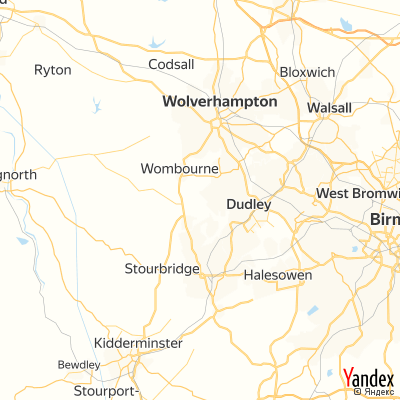

In [16]:
from IPython.display import Image
Image(map_png.content)